In [4]:
import scipy.optimize as opt
import numpy as np
import pylab as plt
from PIL import Image as pil

#define model function and pass independant variables x and y as a list
def twoD_Gaussian(XY, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x,y = XY[0:2]
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo)
                            + c*((y-yo)**2)))
    return g.ravel()

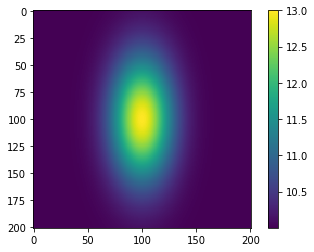

In [6]:
# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)


# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

In [24]:
# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

data_noisy = data + 0.2*np.random.normal(size=data.shape)
#print(x)
#print(y)
print(data_noisy)
print(data_noisy.shape)
print(initial_guess)

[10.05911714  9.90898256 10.29884355 ...  9.85731335  9.86479178
  9.94078371]
(40401,)
(3, 100, 100, 20, 40, 0, 10)


In [22]:
popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)

In [21]:
print(popt)
print(pcov)
data_fitted = twoD_Gaussian((x, y), *popt)
print(data_fitted)

[ 3.00006890e+00  9.99862784e+01  9.99754684e+01  2.00366815e+01
  4.00502998e+01 -3.12713457e-03  9.99833125e+00]
[[ 3.17044399e-05 -9.05381869e-12  7.22844078e-09 -1.01733536e-04
  -2.10849577e-04 -3.90860583e-10 -2.52876368e-07]
 [-9.05381869e-12  1.40353825e-03 -1.32235596e-05 -1.61426063e-10
   3.74554303e-10 -3.08846219e-10  7.21651926e-12]
 [ 7.22844078e-09 -1.32235596e-05  5.63648110e-03  4.31002712e-08
  -1.43705240e-07 -2.91717908e-11 -3.26497181e-09]
 [-1.01733536e-04 -1.61426063e-10  4.31002712e-08  1.71601328e-03
   5.38368387e-04 -3.58991170e-09 -2.36741385e-05]
 [-2.10849577e-04  3.74554303e-10 -1.43705240e-07  5.38368387e-04
   6.74069722e-03  1.57111377e-09 -4.07831580e-05]
 [-3.90860583e-10 -3.08846219e-10 -2.91717908e-11 -3.58991170e-09
   1.57111377e-09  3.13009151e-06  3.41539900e-10]
 [-2.52876368e-07  7.21651926e-12 -3.26497181e-09 -2.36741385e-05
  -4.07831580e-05  3.41539900e-10  1.79339369e-06]]
[9.99833174 9.99833188 9.99833206 ... 9.99833205 9.99833188 9.998

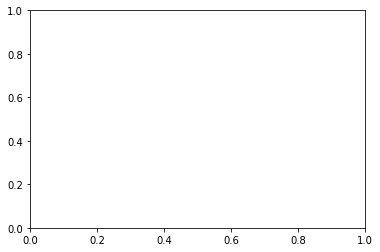

In [10]:
fig, ax = plt.subplots(1, 1)

In [11]:
ax.hold(True)

AttributeError: 'AxesSubplot' object has no attribute 'hold'

In [12]:
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors='w')
plt.show()